In [58]:
import os
import glob
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')

In [59]:
from val import regression_metrics

In [60]:
def plot_ts_forecasting(y_true, y_test):
    """
    Plota uma série temporal real (ground truth) e uma previsão (forecast)
    em um gráfico único, com estilo e separação visual clara.
    
    Parâmetros
    ----------
    y_true : pandas.Series
        Série temporal completa com valores reais, incluindo o período histórico e futuro.
        O índice deve ser de datas (DatetimeIndex).
    
    y_test : pandas.Series
        Série temporal de previsão (forecast), com índice de datas correspondente
        ao horizonte de previsão.
    """

    # Verificações básicas
    if not isinstance(y_true, pd.Series) or not isinstance(y_test, pd.Series):
        raise TypeError("Ambos y_true e y_test devem ser pandas.Series com índice de datas.")
    

    
    # Plot
    plt.figure(figsize=(10, 5))
    
    # Ground truth completa
    plt.plot( y_true.values, label="Ground Truth", color="C0")
    
    # Forecast (linhas tracejadas)
    plt.plot( y_test.values, "--", linewidth=2.0, label="Forecast", color="C1")
    
    # Título e estilo
    plt.title("Ground Truth vs Forecast", fontsize=13)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [61]:
def calculate_metrics_all_stations(
    filepaths: list, 
    model_name: str,
    att_true = "real",
    att_pred = "forecast_mean",
    spliter = ""
) -> list[pd.DataFrame, dict]:
    data = []
    dfs = {}
    df_last = None
    for file in tqdm(filepaths):
        df = pd.read_csv(file)
        res = regression_metrics(df[att_true], df[att_pred])
        res["model"]   = model_name
        if "serie" in df.columns:
            res["station"] = df.serie.iloc[0]
        else:
            station_name = file.split(spliter)[-1].split(".")[0]
            res["station"] = station_name
        data.append(res)
        dfs[res["station"]] = df
        #df_last = df.copy()
        
    return pd.DataFrame(data), dfs

## Sarima

In [62]:
files = glob.glob("sarima/*.csv")
len(files)

51

In [63]:
df_sarima, df_test = calculate_metrics_all_stations(files, "SARIMA")
df_sarima.head()

 41%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                               | 21/51 [00:03<00:04,  6.53it/s]/home/marcos/workdir/phd/Waikato_TAIAO/models/val.py:48: RuntimeWarning: overflow encountered in square
  mse = np.mean(err ** 2)
/home/marcos/workdir/phd/Waikato_TAIAO/models/val.py:54: RuntimeWarning: overflow encountered in square
  ss_res = np.sum(err ** 2)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:07<00:00,  6.49it/s]


,DTW,MAE,MSE,RMSE,MAPE,R2,model,station
0,820.294294,3.287516,16.689133,4.085233,18.264053,-0.855002,SARIMA,Whanganui_Aerodrome
1,871.206823,4.213806,25.639933,5.063589,26.976522,-2.355636,SARIMA,Secretary_Island
2,942.991692,3.996103,25.389145,5.038764,19.828856,-1.893105,SARIMA,Auckland_Aerodrome
3,505.561492,1.563422,4.953741,2.225700,12.489843,0.267863,SARIMA,Chatham_Island
4,962.908572,3.265048,17.439995,4.176122,20.465052,-0.456769,SARIMA,New_Plymouth


In [64]:
df_sarima

,DTW,MAE,MSE,RMSE,MAPE,R2,model,station
0,820.294294,3.287516e+00,1.668913e+01,4.085233e+00,1.826405e+01,-8.550017e-01,SARIMA,Whanganui_Aerodrome
1,871.206823,4.213806e+00,2.563993e+01,5.063589e+00,2.697652e+01,-2.355636e+00,SARIMA,Secretary_Island
2,942.991692,3.996103e+00,2.538915e+01,5.038764e+00,1.982886e+01,-1.893105e+00,SARIMA,Auckland_Aerodrome
3,505.561492,1.563422e+00,4.953741e+00,2.225700e+00,1.248984e+01,2.678635e-01,SARIMA,Chatham_Island
4,962.908572,3.265048e+00,1.744000e+01,4.176122e+00,2.046505e+01,-4.567685e-01,SARIMA,New_Plymouth
5,1523.552873,5.411831e+00,4.173733e+01,6.460444e+00,3.739121e+01,-2.901550e+00,SARIMA,Oamaru_Aerodrome
6,1536.894351,6.461057e+00,6.147296e+01,7.840469e+00,3.726966e+01,-3.325367e+00,SARIMA,Christchurch_Aerodrome
7,2090.317258,8.274910e+00,9.261338e+01,9.623585e+00,5.689203e+01,-2.669973e+00,SARIMA,Dunedin_Aerodrome
8,598.547339,1.815409e+00,5.126089e+00,2.264087e+00,1.095024e+01,-1.160185e+00,SARIMA,Cape_Campbell
9,1641.079993,7.290282e+00,7.219296e+01,8.496644e+00,4.862716e+01,-3.226605e+00,SARIMA,Timaru_Airport


In [112]:
#df_sarima = df_sarima.replace([np.inf, -np.inf], 0)
df_sarima = df_sarima[df_sarima.station != "Hicks_Bay"]
df_sarima.head()

,DTW,MAE,MSE,RMSE,MAPE,R2,model,station
0,820.294294,3.287516,16.689133,4.085233,18.264053,-0.855002,SARIMA,Whanganui_Aerodrome
1,871.206823,4.213806,25.639933,5.063589,26.976522,-2.355636,SARIMA,Secretary_Island
2,942.991692,3.996103,25.389145,5.038764,19.828856,-1.893105,SARIMA,Auckland_Aerodrome
3,505.561492,1.563422,4.953741,2.225700,12.489843,0.267863,SARIMA,Chatham_Island
4,962.908572,3.265048,17.439995,4.176122,20.465052,-0.456769,SARIMA,New_Plymouth


In [113]:
df_sarima

,DTW,MAE,MSE,RMSE,MAPE,R2,model,station
0,820.294294,3.287516e+00,1.668913e+01,4.085233e+00,1.826405e+01,-8.550017e-01,SARIMA,Whanganui_Aerodrome
1,871.206823,4.213806e+00,2.563993e+01,5.063589e+00,2.697652e+01,-2.355636e+00,SARIMA,Secretary_Island
2,942.991692,3.996103e+00,2.538915e+01,5.038764e+00,1.982886e+01,-1.893105e+00,SARIMA,Auckland_Aerodrome
3,505.561492,1.563422e+00,4.953741e+00,2.225700e+00,1.248984e+01,2.678635e-01,SARIMA,Chatham_Island
4,962.908572,3.265048e+00,1.744000e+01,4.176122e+00,2.046505e+01,-4.567685e-01,SARIMA,New_Plymouth
5,1523.552873,5.411831e+00,4.173733e+01,6.460444e+00,3.739121e+01,-2.901550e+00,SARIMA,Oamaru_Aerodrome
6,1536.894351,6.461057e+00,6.147296e+01,7.840469e+00,3.726966e+01,-3.325367e+00,SARIMA,Christchurch_Aerodrome
7,2090.317258,8.274910e+00,9.261338e+01,9.623585e+00,5.689203e+01,-2.669973e+00,SARIMA,Dunedin_Aerodrome
8,598.547339,1.815409e+00,5.126089e+00,2.264087e+00,1.095024e+01,-1.160185e+00,SARIMA,Cape_Campbell
9,1641.079993,7.290282e+00,7.219296e+01,8.496644e+00,4.862716e+01,-3.226605e+00,SARIMA,Timaru_Airport


In [114]:
mean_metrics = df_sarima.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="mean", 
                      dropna=False).reset_index().round(3)

In [115]:
std_metrics =df_sarima.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="std", 
                      dropna=False).reset_index().round(3)
(mean_metrics.astype(str) + " / " + std_metrics.astype(str)).reset_index()

,index,model,DTW,MAE,MAPE,MSE,R2,RMSE
0,0,SARIMA / SARIMA,985.696 / 538.11,3.836 / 2.212,23.376 / 13.73,29.16 / 28.857,-2.8602047253720284e+26 / 2.0224701568904226e+27,4.818 / 2.464


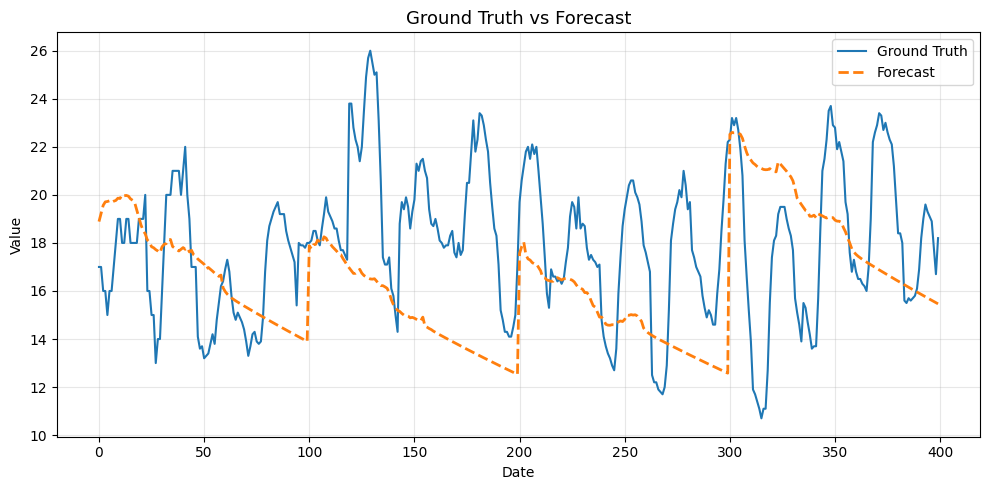

In [68]:
plot_ts_forecasting(df_test["Whanganui_Aerodrome"].real, df_test["Whanganui_Aerodrome"].forecast_mean)
#plot_ts_forecasting(df_test["Hicks_Bay"].real, df_test["Hicks_Bay"].real)

## LSTM

In [69]:
files_lstm = glob.glob("lstm/*.csv")
len(files_lstm)

51

In [70]:
df_lstm, df_test_lstm = calculate_metrics_all_stations(files_lstm, "LSTM")
df_lstm = df_lstm.replace([np.inf, -np.inf], 0)
df_lstm.head()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:07<00:00,  6.54it/s]


,DTW,MAE,MSE,RMSE,MAPE,R2,model,station
0,966.407722,2.436923,9.240450,3.039811,13.922059,-0.027079,LSTM,Whanganui_Aerodrome
1,954.249430,2.407971,7.851169,2.801994,16.888396,-0.027525,LSTM,Secretary_Island
2,983.251493,2.479467,9.455404,3.074964,12.118303,-0.077448,LSTM,Auckland_Aerodrome
3,1247.820114,3.146654,11.018317,3.319385,25.838581,-0.628449,LSTM,Chatham_Island
4,1090.717444,2.750048,12.070091,3.474204,17.362272,-0.008219,LSTM,New_Plymouth


In [71]:
df_lstm

,DTW,MAE,MSE,RMSE,MAPE,R2,model,station
0,966.407722,2.436923,9.240450,3.039811,13.922059,-0.027079,LSTM,Whanganui_Aerodrome
1,954.249430,2.407971,7.851169,2.801994,16.888396,-0.027525,LSTM,Secretary_Island
2,983.251493,2.479467,9.455404,3.074964,12.118303,-0.077448,LSTM,Auckland_Aerodrome
3,1247.820114,3.146654,11.018317,3.319385,25.838581,-0.628449,LSTM,Chatham_Island
4,1090.717444,2.750048,12.070091,3.474204,17.362272,-0.008219,LSTM,New_Plymouth
5,979.851438,2.476399,10.773208,3.282257,17.766881,-0.007065,LSTM,Oamaru_Aerodrome
6,1139.946112,2.884230,15.457942,3.931659,17.552149,-0.087653,LSTM,Christchurch_Aerodrome
7,1591.012188,4.018123,25.605980,5.060235,30.827095,-0.014683,LSTM,Dunedin_Aerodrome
8,476.172373,1.208254,2.424145,1.556967,7.856422,-0.021559,LSTM,Cape_Campbell
9,1251.880651,3.150311,17.122417,4.137924,23.609795,-0.002448,LSTM,Timaru_Airport


In [72]:
mean_metrics = df_lstm.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="mean", 
                      dropna=False).reset_index().round(3)

In [73]:
std_metrics = df_lstm.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="std", 
                      dropna=False).reset_index().round(3)
(mean_metrics.astype(str) + " / " + std_metrics.astype(str)).reset_index()

,index,model,DTW,MAE,MAPE,MSE,R2,RMSE
0,0,LSTM / LSTM,1122.152 / 384.604,2.836 / 0.97,19.353 / 9.314,13.041 / 7.751,-0.066 / 0.115,3.451 / 1.073


In [74]:
plot_ts_forecasting(df_test_lstm.real, df_test_lstm.forecast_mean)

AttributeError: 'dict' object has no attribute 'real'

## GRU

In [ ]:
files_gru = glob.glob("gru/*.csv")
len(files_gru)

In [ ]:
df_gru, df_test_gru = calculate_metrics_all_stations(files_gru, "GRU")
df_gru = df_gru.replace([np.inf, -np.inf], 0)
df_gru.head()

In [ ]:
mean_metrics = df_gru.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="mean", 
                      dropna=False).reset_index().round(3)

In [ ]:
std_metrics = df_gru.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="std", 
                      dropna=False).reset_index().round(3)
(mean_metrics.astype(str) + " / " + std_metrics.astype(str)).reset_index()

In [ ]:
plot_ts_forecasting(df_test_gru.real, df_test_gru.forecast_mean)

## GCN

In [ ]:
files_gcn = glob.glob("gcn/*.csv")
len(files_gcn)

In [ ]:
df_gcn, df_test_gcn = calculate_metrics_all_stations(files_gcn, "GCN")
df_gcn.head()

In [ ]:
# df_gcn = df_gcn.replace([np.inf, -np.inf], 0)
df_gcn#.head()

In [ ]:
df_gcn

In [ ]:
mean_metrics = df_gcn.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="mean", 
                      dropna=False).reset_index().round(3)
mean_metrics

In [ ]:
std_metrics = df_gcn.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="std", 
                      dropna=False).reset_index().round(3)
(mean_metrics.astype(str) + " / " + std_metrics.astype(str)).reset_index()


In [ ]:
plot_ts_forecasting(df_test_gcn["Whanganui_Aerodrome"].real, df_test_gcn["Whanganui_Aerodrome"].forecast_mean)

## SAGE

In [94]:
sage = glob.glob("sage/*.csv")
len(sage)

51

In [95]:
df_sage, df_test_sage = calculate_metrics_all_stations(sage, "SAGE")
df_sage.head()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:07<00:00,  6.44it/s]


,DTW,MAE,MSE,RMSE,MAPE,R2,model,station
0,471.939121,2.141942,7.830765,2.798350,12.253171,0.129598,SAGE,Whanganui_Aerodrome
1,395.123584,1.700128,4.805990,2.192257,11.881267,0.371654,SAGE,Secretary_Island
2,452.571826,1.827797,5.503033,2.345854,9.150691,0.373541,SAGE,Auckland_Aerodrome
3,622.179484,1.629778,7.805196,2.793778,10.951785,-0.163780,SAGE,Chatham_Island
4,608.508655,2.254040,8.506553,2.916600,14.356936,0.289396,SAGE,New_Plymouth


In [96]:
df_sage = df_sage.replace([np.inf, -np.inf], 0)
df_sage.head()

,DTW,MAE,MSE,RMSE,MAPE,R2,model,station
0,471.939121,2.141942,7.830765,2.798350,12.253171,0.129598,SAGE,Whanganui_Aerodrome
1,395.123584,1.700128,4.805990,2.192257,11.881267,0.371654,SAGE,Secretary_Island
2,452.571826,1.827797,5.503033,2.345854,9.150691,0.373541,SAGE,Auckland_Aerodrome
3,622.179484,1.629778,7.805196,2.793778,10.951785,-0.163780,SAGE,Chatham_Island
4,608.508655,2.254040,8.506553,2.916600,14.356936,0.289396,SAGE,New_Plymouth


In [97]:
mean_metrics = df_sage.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="mean", 
                      dropna=False).reset_index().round(3)

In [98]:
std_metrics =df_sage.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="std", 
                      dropna=False).reset_index().round(3)
(mean_metrics.astype(str) + " / " + std_metrics.astype(str)).reset_index()

,index,model,DTW,MAE,MAPE,MSE,R2,RMSE
0,0,SAGE / SAGE,563.396 / 166.413,2.166 / 0.624,14.136 / 4.419,8.83 / 4.499,0.197 / 0.183,2.862 / 0.808


In [ ]:
plot_ts_forecasting(df_test_sage.real, df_test_sage.forecast_mean)

## Cheb

In [99]:
cheb = glob.glob("cheb/*.csv")
len(cheb)

51

In [116]:
# df_cheb, df_test_cheb = calculate_metrics_all_stations(cheb, "CHEB")
df_cheb, df_test_cheb = calculate_metrics_all_stations(glob.glob("cheb/*.csv"), "CHEB")
#df_cheb = df_cheb.replace([np.inf, -np.inf], 0)
df_cheb.head()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:07<00:00,  6.46it/s]


,DTW,MAE,MSE,RMSE,MAPE,R2,model,station
0,535.347898,2.014759,6.634524,2.575757,11.770007,0.262562,CHEB,Whanganui_Aerodrome
1,439.932981,1.787251,4.730729,2.175024,12.668148,0.381494,CHEB,Secretary_Island
2,441.098682,1.694413,4.405073,2.098827,8.652231,0.498531,CHEB,Auckland_Aerodrome
3,406.900352,1.329525,5.445285,2.333513,8.949901,0.188090,CHEB,Chatham_Island
4,591.631358,2.111560,7.688599,2.772832,13.819536,0.357725,CHEB,New_Plymouth


In [117]:
mean_metrics = df_cheb.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="mean", 
                      dropna=False).reset_index().round(3)

In [118]:
std_metrics =df_cheb.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="std", 
                      dropna=False).reset_index().round(3)
(mean_metrics.astype(str) + " / " + std_metrics.astype(str)).reset_index()

,index,model,DTW,MAE,MAPE,MSE,R2,RMSE
0,0,CHEB / CHEB,546.586 / 164.213,2.032 / 0.652,13.456 / 4.691,7.984 / 4.487,0.282 / 0.181,2.691 / 0.871


In [119]:
plot_ts_forecasting(df_test_cheb.real, df_test_cheb.forecast_mean)

AttributeError: 'dict' object has no attribute 'real'

## GAT

In [103]:
gat = glob.glob("gat/*.csv")
len(gat)

51

In [104]:
df_gat, df_test_gat = calculate_metrics_all_stations(gat, "GAT")
df_gat = df_gat.replace([np.inf, -np.inf], 0)
df_gat.head()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:07<00:00,  6.46it/s]


,DTW,MAE,MSE,RMSE,MAPE,R2,model,station
0,916.567773,3.371481,16.676594,4.083699,17.598512,-0.853631,GAT,Whanganui_Aerodrome
1,476.255481,1.854628,5.687584,2.384866,13.398859,0.256393,GAT,Secretary_Island
2,1596.943445,5.475823,34.966635,5.913259,26.190877,-2.980563,GAT,Auckland_Aerodrome
3,1591.554083,4.419388,22.700584,4.764513,37.848062,-2.384732,GAT,Chatham_Island
4,1066.906424,3.649589,17.483229,4.181295,19.961191,-0.460480,GAT,New_Plymouth


In [105]:
mean_metrics = df_gat.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="mean", 
                      dropna=False).reset_index().round(3)

In [106]:
std_metrics =df_gat.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="std", 
                      dropna=False).reset_index().round(3)
(mean_metrics.astype(str) + " / " + std_metrics.astype(str)).reset_index()

,index,model,DTW,MAE,MAPE,MSE,R2,RMSE
0,0,GAT / GAT,1085.756 / 427.09,3.616 / 1.165,24.209 / 13.279,19.183 / 9.814,-1.043 / 1.695,4.235 / 1.13


In [ ]:
plot_ts_forecasting(df_test_gat.real, df_test_gat.forecast_mean)

## LeConv

In [107]:
leconv = glob.glob("leconv/*.csv")
len(leconv)

51

In [108]:
df_leconv, df_test_leconv = calculate_metrics_all_stations(leconv, "LeConv")
df_leconv = df_leconv.replace([np.inf, -np.inf], 0)
df_leconv.head()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:07<00:00,  6.50it/s]


,DTW,MAE,MSE,RMSE,MAPE,R2,model,station
0,1182.029076,2.970207,13.196258,3.632665,15.778422,-0.466786,LeConv,Whanganui_Aerodrome
1,985.955948,2.475610,9.007032,3.001172,19.203985,-0.177599,LeConv,Secretary_Island
2,1776.876781,4.460552,27.634902,5.256891,20.511075,-2.145926,LeConv,Auckland_Aerodrome
3,1578.212981,3.954109,17.331344,4.163093,33.439527,-1.584160,LeConv,Chatham_Island
4,1323.143387,3.322219,15.803503,3.975362,19.051308,-0.320162,LeConv,New_Plymouth


In [109]:
mean_metrics = df_leconv.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="mean", 
                      dropna=False).reset_index().round(3)

In [110]:
std_metrics =df_leconv.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="std", 
                      dropna=False).reset_index().round(3)
(mean_metrics.astype(str) + " / " + std_metrics.astype(str)).reset_index()

,index,model,DTW,MAE,MAPE,MSE,R2,RMSE
0,0,LeConv / LeConv,1447.624 / 482.379,3.646 / 1.203,26.218 / 17.254,19.843 / 11.153,-0.999 / 1.929,4.302 / 1.166


In [ ]:
plot_ts_forecasting(df_test_leconv.real, df_test_leconv.forecast_mean)

## Foundation

### Chronos

In [ ]:
chronos = glob.glob("chronos/*.csv")
len(chronos)

In [76]:
df_chfm , df_test_chfm = calculate_metrics_all_stations(chronos, 
                                                        "CHRONOS", 
                                                        "y_true", 
                                                        "y_hat", 
                                                        spliter="_base_")
df_chfm  = df_chfm.replace([np.inf, -np.inf], 0)
df_chfm .head()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:07<00:00,  6.47it/s]


,DTW,MAE,MSE,RMSE,MAPE,R2,model,station
0,286.253506,1.316935,3.127864,1.768577,8.222526,-3.181133e-01,CHRONOS,Cape_Campbell
1,834.528403,3.811209,24.017560,4.900771,19.563286,-7.863646e-01,CHRONOS,Ngawi_NZNWX
2,6.513778,0.016284,0.000355,0.018848,0.175800,-1.125833e+26,CHRONOS,South_West
3,658.167592,3.774536,21.855159,4.674950,19.973261,-6.308261e-01,CHRONOS,Napier_Aerodrome
4,465.426505,2.638022,10.211311,3.195514,17.731311,-3.364092e-01,CHRONOS,Secretary_Island


In [77]:
mean_metrics = mean_metrics = df_chfm.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="mean", 
                      dropna=False).reset_index().round(3)

In [78]:
std_metrics = df_chfm.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="std", 
                      dropna=False).reset_index().round(3)
(mean_metrics.astype(str) + " / " + std_metrics.astype(str)).reset_index()

,index,model,DTW,MAE,MAPE,MSE,R2,RMSE
0,0,CHRONOS / CHRONOS,661.145 / 311.04,3.136 / 1.167,18.712 / 7.213,19.481 / 12.004,-9.90412966953044e+27 / 7.070427123412159e+28,4.161 / 1.488


In [ ]:
plot_ts_forecasting(df_test_chfm.y_true, df_test_chfm.y_hat)

### TimesFM 200

In [82]:
fm200 = glob.glob("/home/marcos/workdir/timesfm/timesfm/TAIAO/log_timesfm_200m_*")
len(fm200)

51

In [83]:
df_fm200, df_test_fm200 = calculate_metrics_all_stations(fm200, 
                                                        "FM200", 
                                                        "y_true", 
                                                        "y_hat", 
                                                        spliter="_200m_")
#df_fm200  = df_fm200.replace([np.inf, -np.inf], 0)
df_fm200.head()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:07<00:00,  6.45it/s]


,DTW,MAE,MSE,RMSE,MAPE,R2,model,station
0,497.480933,1.864350,6.161889,2.482315,13.724350,0.369923,FM200,Hokitika_Aerodrome
1,449.824190,1.728892,4.479903,2.116578,8.835014,0.423256,FM200,Tauranga_Aerodrome
2,780.707410,3.274957,17.915143,4.232628,23.402301,0.290080,FM200,Dunedin_Aerodrome
3,761.874748,3.210730,16.288670,4.035922,17.115357,-0.211510,FM200,Ngawi_NZNWX
4,370.267561,1.563351,4.583986,2.141025,16.991066,0.057218,FM200,Campbell_Island


In [84]:
df_fm200

,DTW,MAE,MSE,RMSE,MAPE,R2,model,station
0,497.480933,1.864350,6.161889,2.482315,13.724350,3.699227e-01,FM200,Hokitika_Aerodrome
1,449.824190,1.728892,4.479903,2.116578,8.835014,4.232556e-01,FM200,Tauranga_Aerodrome
2,780.707410,3.274957,17.915143,4.232628,23.402301,2.900800e-01,FM200,Dunedin_Aerodrome
3,761.874748,3.210730,16.288670,4.035922,17.115357,-2.115096e-01,FM200,Ngawi_NZNWX
4,370.267561,1.563351,4.583986,2.141025,16.991066,5.721780e-02,FM200,Campbell_Island
5,281.455015,1.257185,2.574565,1.604545,12.283744,8.609497e-02,FM200,Enderby_Island
6,515.240883,2.212846,7.881057,2.807322,15.331526,2.632894e-01,FM200,Oamaru_Aerodrome
7,454.819524,1.706519,4.542531,2.131322,8.818889,6.171872e-01,FM200,Whangarei_Aerodrome
8,380.470316,1.414069,3.369540,1.835631,7.480264,1.390576e-01,FM200,Mokohinau_Island
9,447.906809,2.143856,7.235478,2.689884,16.558753,2.341105e-01,FM200,Nugget_Point


In [86]:
mean_metrics = df_fm200.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="mean", 
                      dropna=False).reset_index().round(3)

In [87]:
std_metrics =df_fm200.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="std", 
                      dropna=False).reset_index().round(3)
(mean_metrics.astype(str) + " / " + std_metrics.astype(str)).reset_index()

,index,model,DTW,MAE,MAPE,MSE,R2,RMSE
0,0,FM200 / FM200,523.721 / 191.894,2.033 / 0.771,13.047 / 5.507,8.893 / 6.763,-8.028579272381516e+26 / 5.586103715095986e+27,2.769 / 1.118


In [ ]:
plot_ts_forecasting(df_test_fm200["Whanganui_Aerodrome"].y_true, df_test_fm200["Whanganui_Aerodrome"].y_hat)

### TimesFM 500

In [88]:
fm500 = glob.glob("/home/marcos/workdir/timesfm/timesfm/TAIAO/log_timesfm_500m_*")
len(fm500)

51

In [89]:
df_fm500, df_test_fm500 = calculate_metrics_all_stations(fm500, 
                                                        "FM500", 
                                                        "y_true", 
                                                        "y_hat", 
                                                        spliter="_500m_")
#df_fm500  = df_fm500.replace([np.inf, -np.inf], 0)
df_fm500.head()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:07<00:00,  6.46it/s]


,DTW,MAE,MSE,RMSE,MAPE,R2,model,station
0,419.199495,1.527614,3.748914,1.936211,7.128371,0.250039,FM500,Raoul_Island
1,478.403687,1.696933,4.560764,2.135595,9.960325,0.232351,FM500,Wellington_Aerodrome
2,363.597897,1.492392,3.688783,1.920620,8.433696,0.597921,FM500,Nelson_Aerodrome
3,399.445475,1.453971,3.279967,1.811068,7.362657,0.577736,FM500,Tauranga_Aerodrome
4,411.187690,1.492648,3.837262,1.958893,8.604409,0.455415,FM500,Hicks_Bay


In [90]:
df_fm500.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc=["mean", "std"], 
                      dropna=False).reset_index().round(3)

model     mean                                                 std        \
              DTW    MAE    MAPE    MSE            R2   RMSE      DTW   MAE   
0  FM500  485.541  1.801  11.493  6.891 -5.034989e+25  2.455  178.561  0.68   

                                      
    MAPE    MSE            R2   RMSE  
0  4.693  4.398  3.184327e+26  0.939

In [93]:
mean_metrics = df_fm500.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="mean", 
                      dropna=False).reset_index().round(3)

In [92]:
std_metrics =df_fm500.pivot_table(index="model", 
                      values=['DTW', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                      aggfunc="std", 
                      dropna=False).reset_index().round(3)
(mean_metrics.astype(str) + " / " + std_metrics.astype(str)).reset_index()

,index,model,DTW,MAE,MAPE,MSE,R2,RMSE
0,0,FM500 / FM500,485.541 / 178.561,1.801 / 0.68,11.493 / 4.693,6.891 / 4.398,-5.034988858908429e+25 / 3.184326787231891e+26,2.455 / 0.939


In [ ]:
plot_ts_forecasting(df_test_fm500.y_true, df_test_fm500.y_hat)

## Test

In [ ]:
df_sample = pd.read_csv(chronos[0])
df_sample.head()